<a href="https://colab.research.google.com/github/Junaidirah/predictive_pm25/blob/master/notebook/eda_tult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [72]:
# import torch
# import tensorflow as tf
# import xgboost as xgb

# print(f"1. PyTorch GPU Available: {torch.cuda.is_available()}")
# if torch.cuda.is_available():
#     print(f"   Device: {torch.cuda.get_device_name(0)}")

# print(f"\n2. TensorFlow GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
# print("   (Harusnya False untuk TF 2.15 di Windows)")

# # XGBoost cek build info
# print(f"\n3. XGBoost Version: {xgb.__version__}")

In [73]:
# path = "D:\development\predictive_pm25\data\data_training\TUTL_RAW_2023-2025.csv"
path = "/content/TUTL_RAW_2023-2025.csv"

In [74]:
df = pd.read_csv(path)

In [75]:
df.describe()

,id,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar
count,426650.000000,417519.000000,4.176560e+05,276408.000000,322366.000000,401906.000000,407618.000000,243101.000000,872.000000,3.318800e+04,0.0
mean,255305.428016,26.264783,3.085701e+05,24.179864,77.782093,639.712592,44.605762,2.721174,0.254587,1.381887e+05,NaN
std,149923.457442,91.214645,2.573745e+07,95.337150,250.183434,223.343031,302.523151,81.301086,7.517869,1.420302e+06,NaN
min,1.000000,-1250.000000,-1.250000e+03,-8.810000,-114346.000000,0.000000,0.000000,0.000000,0.000000,-1.242553e+04,NaN
25%,106663.250000,24.300000,5.800000e+01,21.470000,67.000000,537.020020,20.000000,0.140000,0.000000,0.000000e+00,NaN
50%,278137.500000,26.590000,7.000000e+01,23.340000,82.000000,626.460000,38.000000,2.080000,0.000000,9.247865e+04,NaN
75%,385181.750000,29.420000,8.090000e+01,28.200000,92.000000,705.030030,55.000000,4.060000,0.000000,9.275921e+04,NaN
max,491844.000000,30350.000000,2.147484e+09,24304.000000,61337.000000,4989.965820,64319.000000,40000.000000,222.000000,3.219415e+07,NaN


In [76]:
total_rows = len(df)
missing = df.isnull().sum()
present = df.notnull().sum()
pct_missing = (missing / total_rows) * 100
quality_report = pd.DataFrame({
    'Data Hilang': missing,
    'Data Tersedia': present,
    'Total Seharusnya': total_rows,
    '% Hilang': pct_missing
})
print(quality_report.sort_values(by='% Hilang', ascending=False))

             Data Hilang  Data Tersedia  Total Seharusnya    % Hilang
solar             426650              0            426650  100.000000
wd                425778            872            426650   99.795617
pressure          393462          33188            426650   92.221259
ws                183549         243101            426650   43.020977
sht31_temp        150242         276408            426650   35.214344
sht31_hum         104284         322366            426650   24.442517
co2                24744         401906            426650    5.799602
pm25               19032         407618            426650    4.460799
temperature         9131         417519            426650    2.140162
humidity            8994         417656            426650    2.108051
id                     0         426650            426650    0.000000
created_at             0         426650            426650    0.000000


In [77]:
df.head()

,id,created_at,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar
0,1,2023-03-29 20:08:00,28.6,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2023-03-29 20:10:00,28.6,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2023-03-29 20:20:00,29.8,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023-03-29 20:22:00,29.8,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023-03-29 20:24:00,28.6,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
target_cols = ['pm25', 'temperature', 'humidity', 'ws', 'wd','sht31_temp','sht31_hum']

percentage_missing = df.groupby('year')[target_cols].apply(
    lambda x: x.isnull().mean() * 100
)

percentage_missing = percentage_missing.round(2)

percentage_missing = percentage_missing.reset_index()

print("Data Awal (Cuplikan):")
df.head()
print("\n--- Hasil Persentase Data Hilang per Tahun per Kolom ---")
print(percentage_missing)

Data Awal (Cuplikan):

--- Hasil Persentase Data Hilang per Tahun per Kolom ---
   year   pm25  temperature  humidity      ws      wd  sht31_temp  sht31_hum
0  2023  16.11         8.76      8.76  100.00  100.00      100.00      63.90
1  2024   2.95         0.12      0.08   74.74  100.00       48.66      37.19
2  2025   0.61         0.66      0.62    0.63   99.59        0.64       0.64


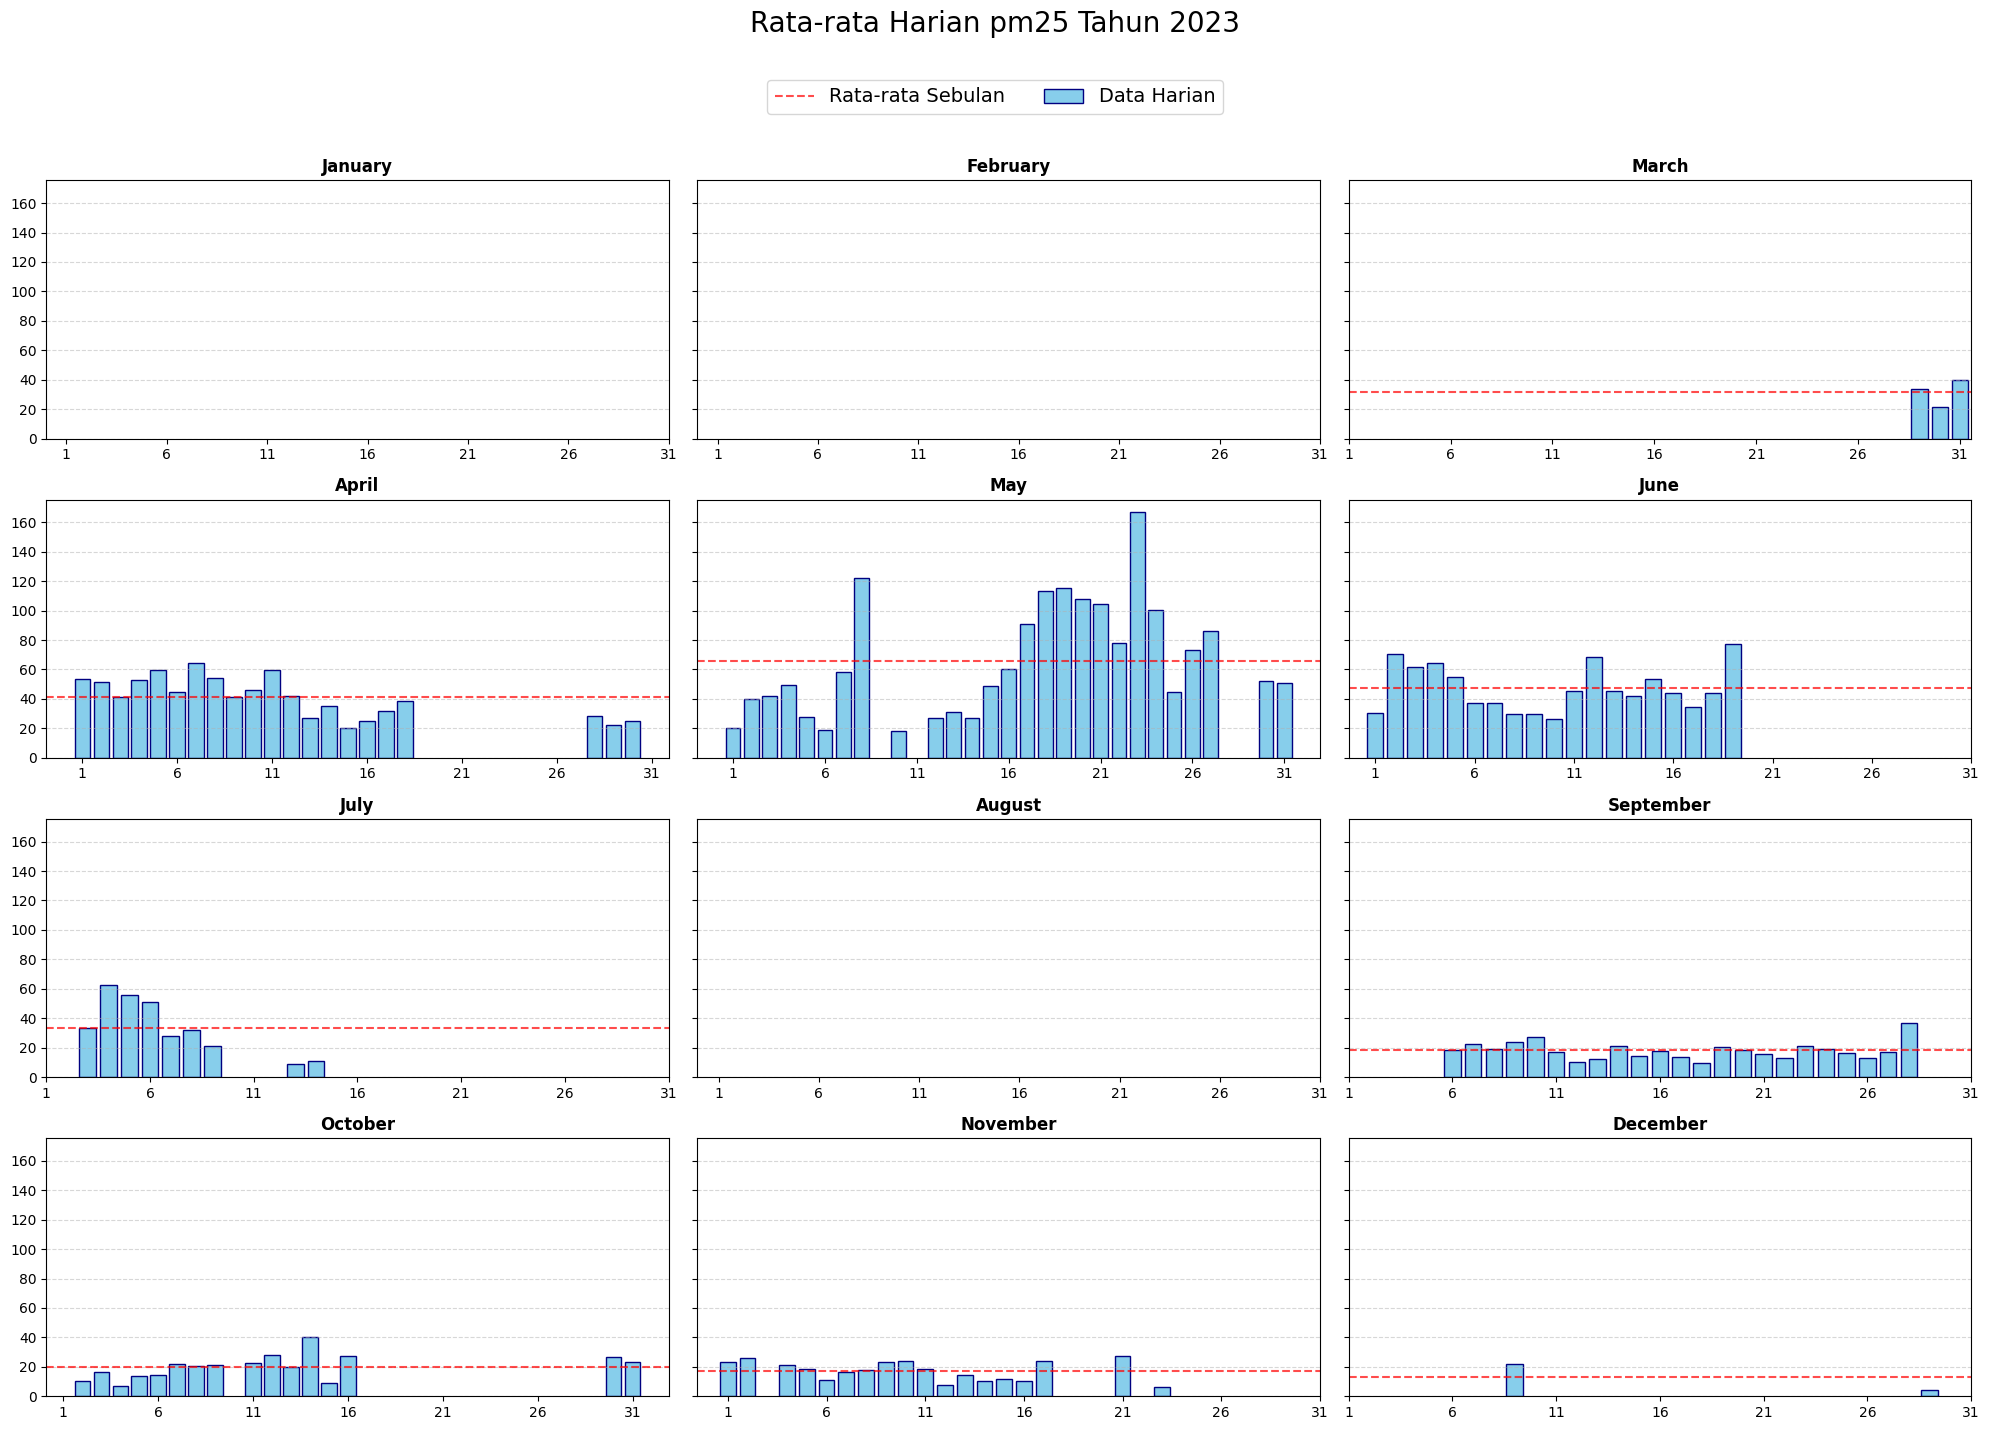

In [79]:
import calendar
df['created_at'] = pd.to_datetime(df['created_at'])
df_2023 = df[df['created_at'].dt.year == 2023].copy()
df_2023 = df_2023.set_index('created_at')
daily_avg = df_2023.resample('D').mean()
daily_avg = daily_avg.round(1)
kolom_target = 'pm25'

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharey=True)
fig.suptitle(f'Rata-rata Harian {kolom_target} Tahun 2023', fontsize=20)

axes = axes.flatten()

for i in range(1, 13):
    data_bulan = daily_avg[daily_avg.index.month == i]
    ax = axes[i-1]

    if not data_bulan.empty:
        ax.bar(data_bulan.index.day, data_bulan[kolom_target],
               color='skyblue', edgecolor='navy', label='Data Harian')

        rata_rata_bulan = data_bulan[kolom_target].mean()
        ax.axhline(y=rata_rata_bulan, color='red', linestyle='--', alpha=0.7, label='Rata-rata Sebulan')

    nama_bulan = calendar.month_name[i]
    ax.set_title(nama_bulan, fontsize=12, fontweight='bold')
    ax.set_xticks(range(1, 32, 5))
    ax.grid(axis='y', linestyle='--', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.94), fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

### DROP DATA 2023

In [80]:
df['created_at']= pd.to_datetime(df['created_at'])
df_drop_2023 = df[df['created_at'].dt.year != 2023]
index_to_drop = df[df['created_at'].dt.year == 2023].index
df.drop(index_to_drop, inplace=True)
print("Data setelah menghapus tahun 2023:")
df.head()

Data setelah menghapus tahun 2023:


,id,created_at,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar,year
86672,86673,2024-01-19 08:48:00,25.7,75.2,NaN,NaN,766.88342,31.0,NaN,NaN,NaN,NaN,2024
86673,86674,2024-01-19 08:50:00,25.6,71.7,NaN,NaN,695.20764,31.0,NaN,NaN,NaN,NaN,2024
86674,86675,2024-01-19 08:56:00,25.3,70.4,NaN,NaN,708.16302,32.0,NaN,NaN,NaN,NaN,2024
86675,86676,2024-01-19 08:58:00,25.4,70.0,NaN,NaN,731.03546,31.0,NaN,NaN,NaN,NaN,2024
86676,86677,2024-01-19 09:00:00,25.4,69.6,NaN,NaN,744.97290,29.0,NaN,NaN,NaN,NaN,2024


### Data Cleaning

In [81]:
# columns_to_drop = ['sht31_temp', 'sht31_hum', 'co2', 'pressure', 'solar']
# df.drop(columns=columns_to_drop, inplace=True)
# print(f"Columns dropped: {columns_to_drop}")
# df.head()

In [82]:
total_rows = len(df)
missing = df.isnull().sum()
present = df.notnull().sum()
pct_missing = (missing / total_rows) * 100
quality_report = pd.DataFrame({
    'Data Hilang': missing,
    'Data Tersedia': present,
    'Total Seharusnya': total_rows,
    '% Hilang': pct_missing
})
print(quality_report.sort_values(by='% Hilang', ascending=False))

             Data Hilang  Data Tersedia  Total Seharusnya    % Hilang
solar             339978              0            339978  100.000000
wd                339106            872            339978   99.743513
pressure          306790          33188            339978   90.238192
ws                 96877         243101            339978   28.495079
sht31_temp         63570         276408            339978   18.698269
sht31_hum          48901         291077            339978   14.383578
co2                 6031         333947            339978    1.773938
pm25                5071         334907            339978    1.491567
temperature         1540         338438            339978    0.452970
humidity            1401         338577            339978    0.412085
id                     0         339978            339978    0.000000
created_at             0         339978            339978    0.000000
year                   0         339978            339978    0.000000


In [83]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
target_cols = ['pm25', 'temperature', 'humidity', 'ws', 'wd','sht31_temp','sht31_hum']

percentage_missing = df.groupby('year')[target_cols].apply(
    lambda x: x.isnull().mean() * 100
)

percentage_missing = percentage_missing.round(2)

percentage_missing = percentage_missing.reset_index()

print("Data Awal (Cuplikan):")
df.head()
print("\n--- Hasil Persentase Data Hilang per Tahun per Kolom ---")
print(percentage_missing)

Data Awal (Cuplikan):

--- Hasil Persentase Data Hilang per Tahun per Kolom ---
   year  pm25  temperature  humidity     ws      wd  sht31_temp  sht31_hum
0  2024  2.95         0.12      0.08  74.74  100.00       48.66      37.19
1  2025  0.61         0.66      0.62   0.63   99.59        0.64       0.64


### Persentase Data Hilang per Tahun (2024 & 2025)

In [84]:
df_current_years = df.copy()

# Exclude 'id', 'created_at', and 'year' from the missing value calculation as they shouldn't have missing values or are used for grouping
columns_for_missing_check = [col for col in df_current_years.columns if col not in ['id', 'created_at', 'year']]

# Calculate percentage missing for the remaining columns, grouped by year
percentage_missing_by_year = df_current_years.groupby('year')[columns_for_missing_check].apply(lambda x: x.isnull().mean() * 100)

# Round to 2 decimal places and reset index for better display
percentage_missing_by_year = percentage_missing_by_year.round(2).reset_index()

print("--- Hasil Persentase Data Hilang per Tahun (2024 & 2025) ---")
display(percentage_missing_by_year)

--- Hasil Persentase Data Hilang per Tahun (2024 & 2025) ---


,year,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar
0,2024,0.12,0.08,48.66,37.19,3.64,2.95,74.74,100.00,74.72,100.0
1,2025,0.66,0.62,0.64,0.64,0.65,0.61,0.63,99.59,99.59,100.0


In [85]:
df_2024_temp = df[df['created_at'].dt.year == 2024].copy()

df_2024_temp['month'] = df_2024_temp['created_at'].dt.month

target_cols_for_missing = ['temperature', 'humidity', 'pm25', 'ws', 'wd']

percentage_missing_2024_monthly = df_2024_temp.groupby('month')[target_cols_for_missing].apply(
    lambda x: x.isnull().mean() * 100
)

percentage_missing_2024_monthly = percentage_missing_2024_monthly.round(2)

print("--- Persentase Kehilangan Data per Bulan di Tahun 2024 ---")
display(percentage_missing_2024_monthly)

--- Persentase Kehilangan Data per Bulan di Tahun 2024 ---


,temperature,humidity,pm25,ws,wd
month,,,,,
1,0.00,0.00,0.86,100.00,100.0
2,0.00,0.00,6.82,100.00,100.0
3,0.00,0.00,0.95,100.00,100.0
4,0.00,0.00,17.57,100.00,100.0
5,0.00,0.00,0.01,100.00,100.0
6,0.00,0.00,0.00,100.00,100.0
7,0.00,0.00,0.00,100.00,100.0
8,2.09,2.09,0.00,99.97,100.0
9,0.00,0.00,0.00,100.00,100.0


In [86]:
display(df)

,id,created_at,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar,year
86672,86673,2024-01-19 08:48:00,25.70,75.2,NaN,NaN,766.88342,31.0,NaN,NaN,NaN,NaN,2024
86673,86674,2024-01-19 08:50:00,25.60,71.7,NaN,NaN,695.20764,31.0,NaN,NaN,NaN,NaN,2024
86674,86675,2024-01-19 08:56:00,25.30,70.4,NaN,NaN,708.16302,32.0,NaN,NaN,NaN,NaN,2024
86675,86676,2024-01-19 08:58:00,25.40,70.0,NaN,NaN,731.03546,31.0,NaN,NaN,NaN,NaN,2024
86676,86677,2024-01-19 09:00:00,25.40,69.6,NaN,NaN,744.97290,29.0,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426645,491840,2025-11-24 11:50:00,32.36,44.0,29.69,64.0,481.04000,16.0,0.23,NaN,NaN,NaN,2025
426646,491841,2025-11-24 11:52:00,32.36,44.0,29.82,62.0,481.03000,17.0,0.23,NaN,NaN,NaN,2025
426647,491842,2025-11-24 11:54:00,32.32,44.0,29.90,63.0,482.04000,19.0,0.23,NaN,NaN,NaN,2025
426648,491843,2025-11-24 11:56:00,32.39,44.0,29.76,63.0,487.01000,19.0,0.23,NaN,NaN,NaN,2025


In [87]:
# Ensure 'created_at' is a datetime object in the original df
if not pd.api.types.is_datetime64_any_dtype(df['created_at']):
    df['created_at'] = pd.to_datetime(df['created_at'])

specific_date = '2024-07-28'
# Filter the original df for the specific date
data_for_date_df = df[df['created_at'].dt.date == pd.to_datetime(specific_date).date()]

if not data_for_date_df.empty:
    print(f"--- Data dari df untuk tanggal {specific_date} ---")
    display(data_for_date_df)
else:
    print(f"Tidak ditemukan data dari df untuk tanggal {specific_date}.")

--- Data dari df untuk tanggal 2024-07-28 ---


,id,created_at,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar,year
149605,196833,2024-07-28 00:09:00,21.7,88.3,21.01320,86.87572,602.59314,33.0,NaN,NaN,NaN,NaN,2024
149606,196874,2024-07-28 01:32:00,21.5,87.1,20.19341,87.57610,613.50104,28.0,NaN,NaN,NaN,NaN,2024
149607,196914,2024-07-28 02:53:00,20.4,90.1,19.82491,87.58526,579.61456,32.0,NaN,NaN,NaN,NaN,2024
149608,196954,2024-07-28 04:14:00,20.2,90.6,19.13062,89.12337,600.57941,38.0,NaN,NaN,NaN,NaN,2024
149609,196995,2024-07-28 05:37:00,20.4,90.4,18.75944,90.96666,656.41235,45.0,NaN,NaN,NaN,NaN,2024
149610,197035,2024-07-28 06:58:00,20.4,90.1,20.13733,86.29893,686.22137,71.0,NaN,NaN,NaN,NaN,2024
149611,197115,2024-07-28 09:40:00,26.4,67.6,29.94545,54.88976,524.87012,18.0,NaN,NaN,NaN,NaN,2024
149612,197155,2024-07-28 11:01:00,28.9,60.7,31.36340,51.28252,453.17029,22.0,NaN,NaN,NaN,NaN,2024
149613,197195,2024-07-28 12:22:00,30.3,56.0,33.27802,47.33501,436.16034,17.0,NaN,NaN,NaN,NaN,2024
149614,197277,2024-07-28 15:08:00,29.9,58.0,30.96552,57.01686,484.05823,25.0,NaN,NaN,NaN,NaN,2024


In [88]:
# Define the target columns for missing data check
param_cols = ['temperature', 'humidity', 'pm25']
expected_daily_entries = 720  # 60 minutes / 2 minutes * 24 hours

# Filter for years 2024 and 2025
df_filtered_years = df[df['year'].isin([2024, 2025])].copy()

# Ensure 'created_at' is datetime and set as index for resampling
df_filtered_years['created_at'] = pd.to_datetime(df_filtered_years['created_at'])
df_filtered_years = df_filtered_years.set_index('created_at')

print("--- Daily Missing Data Report (2024 & 2025) ---")

# Group by day and count non-null entries for specified columns
daily_counts = df_filtered_years.resample('D')[param_cols].count()

# Identify days where any column has less than expected entries
missing_data_daily = daily_counts[daily_counts < expected_daily_entries].dropna(how='all')

if not missing_data_daily.empty:
    print(f"Ditemukan kehilangan data harian untuk parameter berikut (nilai kurang dari {expected_daily_entries} entri per hari):\n")
    # Calculate actual missing count per day and percentage
    daily_missing_report = (expected_daily_entries - missing_data_daily).apply(lambda x: x.apply(lambda y: f'{int(y)} ({y/expected_daily_entries:.2%})' if pd.notna(y) else 'N/A'))
    print(daily_missing_report.to_markdown(index=True, numalign="left", stralign="left"))

    print("\nRingkasan Persentase Kehilangan Data Harian (lebih dari 0% hilang):\n")
    # Calculate percentage missing for the days with missing data
    percentage_missing_summary = ((expected_daily_entries - missing_data_daily) / expected_daily_entries * 100).round(2)
    # Filter to show only columns with actual missing data for that day
    percentage_missing_summary = percentage_missing_summary.apply(lambda x: x[x > 0])
    print(percentage_missing_summary.to_markdown(index=True, numalign="left", stralign="left"))

else:
    print("Tidak ada kehilangan data harian yang terdeteksi untuk parameter yang dipilih (setiap hari memiliki 720 entri).")


--- Daily Missing Data Report (2024 & 2025) ---
Ditemukan kehilangan data harian untuk parameter berikut (nilai kurang dari 720 entri per hari):

| created_at          | temperature   | humidity      | pm25          |
|:--------------------|:--------------|:--------------|:--------------|
| 2024-01-19 00:00:00 | 323 (44.86%)  | 323 (44.86%)  | 343 (47.64%)  |
| 2024-01-20 00:00:00 | 11 (1.53%)    | 11 (1.53%)    | 17 (2.36%)    |
| 2024-01-21 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 15 (2.08%)    |
| 2024-01-22 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 14 (1.94%)    |
| 2024-01-23 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 17 (2.36%)    |
| 2024-01-24 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 19 (2.64%)    |
| 2024-01-25 00:00:00 | 13 (1.81%)    | 13 (1.81%)    | 15 (2.08%)    |
| 2024-01-26 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 10 (1.39%)    |
| 2024-01-27 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 12 (1.67%)    |
| 2024-01-28 00:00:00 | 10 (1.39%)    | 10 (1.39%)    | 12 (1.

In [89]:
# Identify days with more than 50% missing data for ANY parameter
days_with_high_missing = percentage_missing_summary[(percentage_missing_summary > 50).any(axis=1)].index

# Identify days with 50% or less missing data for ALL parameters
days_with_low_missing = percentage_missing_summary[(percentage_missing_summary <= 50).all(axis=1)].index

print("--- Laporan Kehilangan Data Harian (Lebih dari 50% Hilang) ---\n")
if not days_with_high_missing.empty:
    high_missing_daily_report = daily_missing_report.loc[days_with_high_missing]
    high_missing_percentage_summary = percentage_missing_summary.loc[days_with_high_missing]
    print("Jumlah data yang hilang dan persentasenya:")
    print(high_missing_daily_report.to_markdown(index=True, numalign="left", stralign="left"))
    print("\nRingkasan Persentase Kehilangan Data Harian (lebih dari 0% hilang):")
    print(high_missing_percentage_summary.to_markdown(index=True, numalign="left", stralign="left"))
else:
    print("Tidak ada hari dengan kehilangan data lebih dari 50% untuk parameter yang dipilih.")

print("\n--- Laporan Kehilangan Data Harian (Kurang dari atau Sama dengan 50% Hilang) ---\n")
if not days_with_low_missing.empty:
    low_missing_daily_report = daily_missing_report.loc[days_with_low_missing]
    low_missing_percentage_summary = percentage_missing_summary.loc[days_with_low_missing]
    print("Jumlah data yang hilang dan persentasenya:")
    print(low_missing_daily_report.to_markdown(index=True, numalign="left", stralign="left"))
    print("\nRingkasan Persentase Kehilangan Data Harian (lebih dari 0% hilang):")
    print(low_missing_percentage_summary.to_markdown(index=True, numalign="left", stralign="left"))
else:
    print("Semua hari memiliki kehilangan data lebih dari 50% untuk setidaknya satu parameter.")

--- Laporan Kehilangan Data Harian (Lebih dari 50% Hilang) ---

Jumlah data yang hilang dan persentasenya:
| created_at          | temperature   | humidity      | pm25          |
|:--------------------|:--------------|:--------------|:--------------|
| 2024-02-11 00:00:00 | 720 (100.00%) | 720 (100.00%) | 720 (100.00%) |
| 2024-02-12 00:00:00 | 614 (85.28%)  | 614 (85.28%)  | 614 (85.28%)  |
| 2024-02-13 00:00:00 | 719 (99.86%)  | 719 (99.86%)  | 719 (99.86%)  |
| 2024-02-14 00:00:00 | 719 (99.86%)  | 719 (99.86%)  | 719 (99.86%)  |
| 2024-02-15 00:00:00 | 720 (100.00%) | 720 (100.00%) | 720 (100.00%) |
| 2024-02-16 00:00:00 | 720 (100.00%) | 720 (100.00%) | 720 (100.00%) |
| 2024-02-17 00:00:00 | 719 (99.86%)  | 719 (99.86%)  | 719 (99.86%)  |
| 2024-02-18 00:00:00 | 720 (100.00%) | 720 (100.00%) | 720 (100.00%) |
| 2024-02-23 00:00:00 | 383 (53.19%)  | 383 (53.19%)  | 383 (53.19%)  |
| 2024-02-24 00:00:00 | 420 (58.33%)  | 420 (58.33%)  | 420 (58.33%)  |
| 2024-02-29 00:00:00 | 720 (

### Rekapitulasi Jumlah Hari Berdasarkan Persentase Kehilangan Data

In [90]:
num_days_high_missing = len(days_with_high_missing)
num_days_low_missing = len(days_with_low_missing)

print(f"Jumlah hari dengan kehilangan data lebih dari 50%: {num_days_high_missing} hari")
print(f"Jumlah hari dengan kehilangan data 50% atau kurang: {num_days_low_missing} hari")

Jumlah hari dengan kehilangan data lebih dari 50%: 188 hari
Jumlah hari dengan kehilangan data 50% atau kurang: 445 hari
